# Pymaceuticals Inc.
---

### Analysis
- The pharmaceutical studied a total of 249 mice, female and male, who were trated with different experimental drugs, in total there were ten drugs that were applied during a period of 45 days.

- The results indicate that the top four drogs are: Capomulin, Ramicane, Propriva and Infubinol. The Ramicane was the most effective, because it presents an average Tumor Volume (mm3) smaller than the others (40.675741 mm3). The studies of the four drugs mentioned can be considered reliable, since the interqurtile ranges have values close to the mean, indicating that there is no data dispersion.

- Something important to point is the correlation between the weight and the size of the tumors, since the more weight the mouse have the tumor size tends to increase. Although I believe that this should be studied in more depth, because I believe that the weight of the mouse increases because the tumor itself is also increasing.


In [330]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
data_complete.head()

# Display the data table for preview
data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [97]:
# Checking the number of mice.

#data_complete["Mouse ID"].value_counts()
number_mice = data_complete['Mouse ID'].nunique()
print('The total number of mice is: ' + str(number_mice))

The total number of mice is: 249


In [98]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = data_complete[data_complete.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [99]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicate = data_complete['Mouse ID'] == 'g989'
duplicate = data_complete[mice_duplicate]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [100]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = data_complete.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [101]:
# Checking the number of mice in the clean DataFrame.
number_mice = clean['Mouse ID'].nunique()
print('The total number of mice is: ' + str(number_mice))

The total number of mice is: 249


## Summary Statistics

In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mn = clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mdn = clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
vari = clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stand= clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
err=clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

mrg = pd.concat([mn, mdn,vari,stand,err], axis=1)

mrg.columns = ['Mean Tumor Volume','Median Tumor Volume','Tumor Volume Variance',
               'Tumor VolumeStd. Dev','Tumor Volume Std. Err.']
mrg


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor VolumeStd. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [103]:

# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

tumor_agg = clean.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median','var','std','sem']})
tumor_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

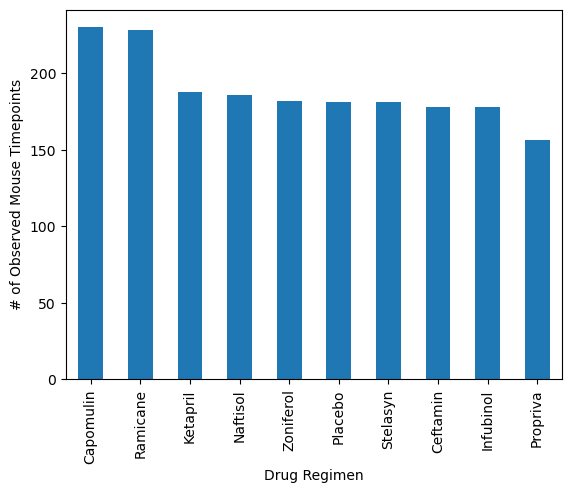

In [104]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
labels = clean['Drug Regimen'].value_counts().index
values = clean['Timepoint'].value_counts()

chart = clean.groupby('Drug Regimen')['Timepoint'].count()
chart_sorted = chart.sort_values(ascending=False)

ejes = chart_sorted.plot.bar(x = "Drug Regimen", y = 'Timepoint' )
#ejes.set_xlabel("Drug Regimen")
ejes.set_ylabel("# of Observed Mouse Timepoints")



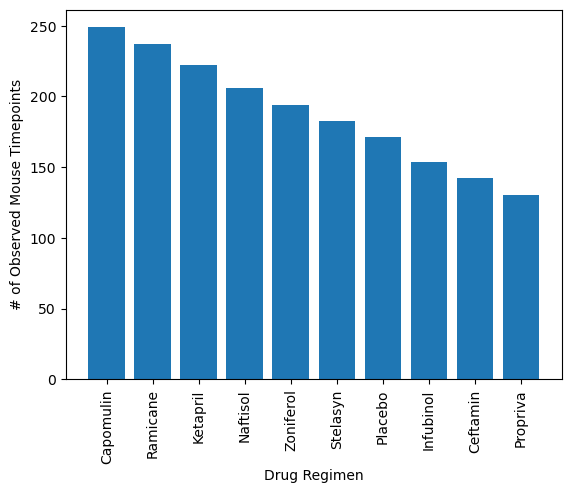

In [105]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

labels = clean['Drug Regimen'].value_counts().index
values = clean['Timepoint'].value_counts()
#plt.figure(figsize=[10,3])
plt.xticks(rotation = 'vertical')
plt.bar(labels, values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

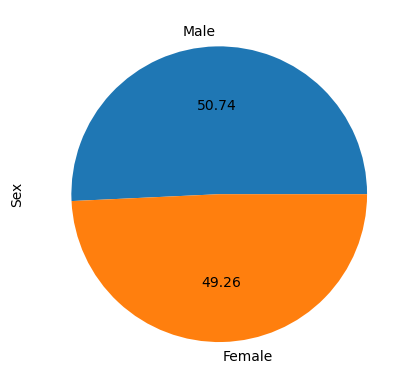

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

chart = clean['Sex'].value_counts().plot(kind='pie', autopct=autopct)

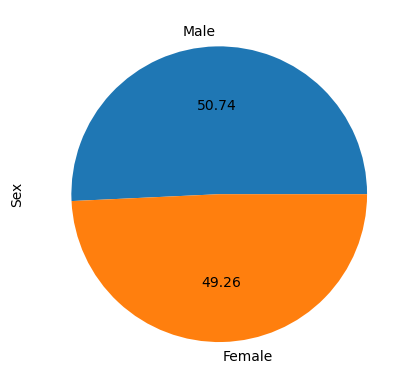

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

chart_py = clean['Sex'].value_counts()
chart_py
plt.axes().set_ylabel('Sex')
plt.pie(chart_py, autopct= autopct,labels = ['Male','Female'])
plt.show()

## Quartiles, Outliers and Boxplots

In [241]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

filtro = clean.sort_values(by = ['Mouse ID', 'Timepoint'], ascending = [True, True])
c = filtro.groupby(['Mouse ID'])['Timepoint'].max()
c = c.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#clean.merge(c.to_frame()on=["Mouse ID"])
clean_1 = pd.merge(clean, c, how="right", on=["Mouse ID", 'Timepoint']) 
clean_1

#clean_2 = clean_1[(clean_1['Timepoint_x']==clean_1['Timepoint_y'])]
#clean_2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [287]:
# Put treatments into a list for for loop (and later for plot labels)

wisp = ['Capomulin','Infubinol','Ramicane','Ceftamin']
#treat

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Iterate over each row
for drug in wisp:
    ori = clean_1.loc[clean_1['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    vol_data.append(ori)
#df = pd.DataFrame (vol_data, columns = ['Drug Regimen'])
#print (vol_data)

In [291]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = clean_1[clean_1["Drug Regimen"].isin(drug_list)]
drugs


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)",
                                                                             lambda x: x.iloc[-1]))
#Reshape dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)
    
drugs

Capomulin
Ramicane
Infubinol
Ceftamin


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
239,y769,45,68.594745,4,Ceftamin,Female,6,27
240,y793,45,31.896238,2,Capomulin,Male,17,17
241,y865,45,64.729837,3,Ceftamin,Male,23,26
245,z578,45,30.638696,0,Ramicane,Male,11,16


In [282]:
# Put treatments into a list for for loop (and later for plot labels)   
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes add subset 
# Determine outliers using upper and lower bounds
treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

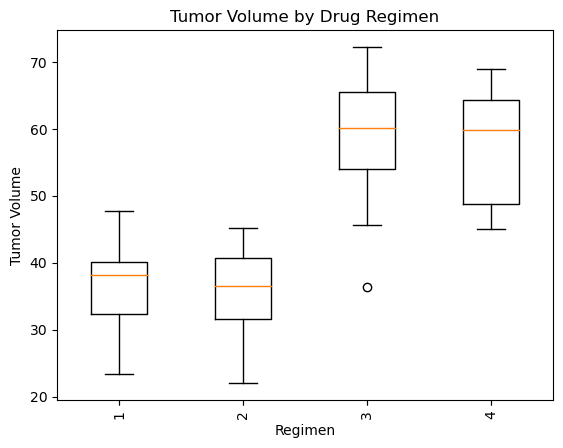

In [301]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], rotation=90)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(boxplot_list)
plt.show()

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

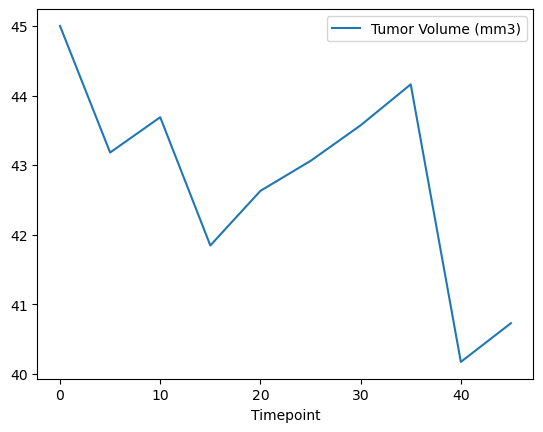

In [311]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
wisp = ["Capomulin"]
prueba = clean[clean["Drug Regimen"].isin(wisp)]
prueba

ori = prueba.loc[prueba['Mouse ID'] == 's710']
ori
ori.plot.line(x='Timepoint', y='Tumor Volume (mm3)')

<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

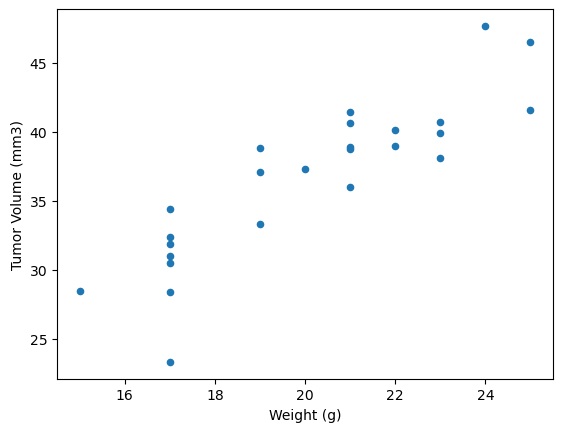

In [326]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
wisp = ["Capomulin"]
prueba = clean_1[clean_1["Drug Regimen"].isin(wisp)]
prueba

#c = prueba.groupby(['Tumor Volume (mm3)'])['Weight (g)'].count()



#ori = prueba.loc[prueba['Mouse ID'] == 's710']
#ori
prueba.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')

## Correlation and Regression

In [327]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
prueba.corr()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Timepoint,1.000000,-0.200189,0.496658,-0.352502,-0.256449
Tumor Volume (mm3),-0.200189,1.000000,0.006473,0.007213,0.876706
Metastatic Sites,0.496658,0.006473,1.000000,0.052656,-0.012480
Age_months,-0.352502,0.007213,0.052656,1.000000,-0.074396
Weight (g),-0.256449,0.876706,-0.012480,-0.074396,1.000000


In [331]:
x_values = prueba['Weight (g)']
y_values = prueba['Tumor Volume (mm3)']
slope,intercept,rvalue,pvalue,stderr =linregress(x_values,y_values)

In [332]:
line_eq = f'y = {round(intercept,2)} + {round(slope,2)} X'
line_eq

'y = 1.45 + 1.75 X'

Correlation between weigh and the average tumor volumes is: 0.877


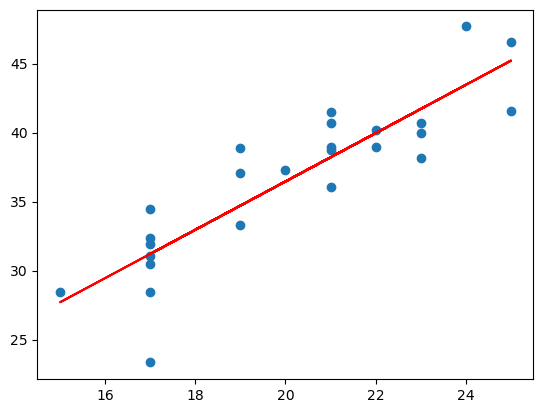

In [344]:
y_predict = intercept + (slope * x_values)
plt.scatter(x_values,y_values)
plt.plot(x_values, y_predict, color = "r")
plt.annotate(line_eq, (5,9), color = 'r', fontsize = 15)

from scipy.stats import pearsonr

corr, _ = pearsonr(x_values, y_values)
print('Correlation between weigh and the average tumor volumes is: %.3f' % corr)